In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\regression_train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'P

## EDA:
         -missing values handling
        -correlation check
       - outliers detection
       - normalisation
       - encoding 
       - target analysis

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
## missing values handling 
null_count = df.isnull().sum()
null_per = round(null_count/df.shape[0]*100,2)
dumm_df = pd.concat([pd.DataFrame(null_count, columns=['Null count']), 
                     pd.DataFrame(null_per, columns=['Null Precentage'])], axis = 1)
dumm_df = dumm_df.sort_values(by = ['Null Precentage'], ascending = False)
dumm_df[dumm_df['Null Precentage']>0]

Null count  Null Precentage
PoolQC              1453            99.52
MiscFeature         1406            96.30
Alley               1369            93.77
Fence               1179            80.75
FireplaceQu          690            47.26
LotFrontage          259            17.74
GarageYrBlt           81             5.55
GarageCond            81             5.55
GarageType            81             5.55
GarageFinish          81             5.55
GarageQual            81             5.55
BsmtFinType2          38             2.60
BsmtExposure          38             2.60
BsmtQual              37             2.53
BsmtCond              37             2.53
BsmtFinType1          37             2.53
MasVnrArea             8             0.55
MasVnrType             8             0.55
Electrical             1             0.07

All columns having Null Percentage> 70% can be dropped off....

In [9]:
col = ['PoolQC','MiscFeature','Alley','Fence']
df.drop(col, axis = 1, inplace = True)

In [10]:
df.shape

(1460, 77)

In [11]:
df.drop(['Id','SalePrice'], axis = 1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition
0             60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal
1             20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal
2             60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal
3             70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd            

In [12]:
df.shape

(1460, 77)

In [13]:
numerical_features = df.select_dtypes(include = np.number).columns
categorical_features = df.select_dtypes(include = np.object).columns
print(numerical_features,categorical_features,sep = '\n')

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', '

In [14]:
df[numerical_features].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
for column in numerical_features:
    df[column].fillna(np.mean(df[column]),inplace = True)

In [16]:
df[numerical_features].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [17]:
import seaborn as sns
from scipy.stats import skew

In [18]:
dummy_df  = skew(df[numerical_features])
_ = pd.concat([pd.DataFrame(numerical_features, columns = ['Features']), 
          pd.DataFrame(dummy_df, columns = ['Skewness'])], axis = 1)
_ .sort_values('Skewness', ascending = False)

Features   Skewness
34        MiscVal  24.451640
33       PoolArea  14.813135
3         LotArea  12.195142
31      3SsnPorch  10.293752
15   LowQualFinSF   9.002080
22   KitchenAbvGr   4.483784
10     BsmtFinSF2   4.250888
32    ScreenPorch   4.117977
18   BsmtHalfBath   4.099186
30  EnclosedPorch   3.086696
8      MasVnrArea   2.673661
2     LotFrontage   2.382499
29    OpenPorchSF   2.361912
37      SalePrice   1.880941
9      BsmtFinSF1   1.683771
28     WoodDeckSF   1.539792
12    TotalBsmtSF   1.522688
1      MSSubClass   1.406210
13       1stFlrSF   1.375342
16      GrLivArea   1.365156
11      BsmtUnfSF   0.919323
14       2ndFlrSF   0.812194
5     OverallCond   0.692355
23   TotRmsAbvGrd   0.675646
20       HalfBath   0.675203
24     Fireplaces   0.648898
17   BsmtFullBath   0.595454
4     OverallQual   0.216721
35         MoSold   0.211835
21   BedroomAbvGr   0.211572
27     GarageArea   0.179796
36         YrSold   0.096170
19       FullBath   0.036524
0              Id   0.000000
26     GarageCars  -0.342197
7    YearRemodAdd  -0.503044
6       YearBuilt  -0.612831
25    GarageYrBlt  -0.667488

# to reduce positive skewness: log, sqrt root, 1/3rd root...
# to reduce negative skewness: square, cube, ....

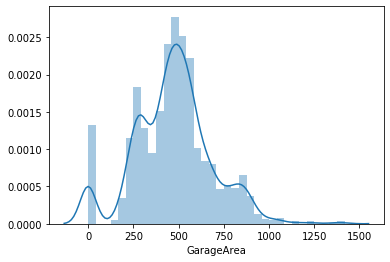

In [19]:
sns.distplot(df['GarageArea'])

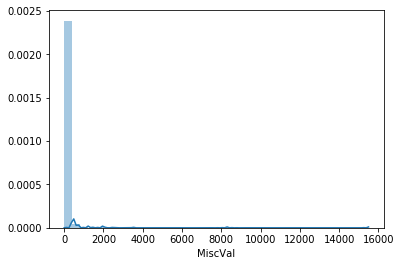

In [20]:
sns.distplot(df['MiscVal'])

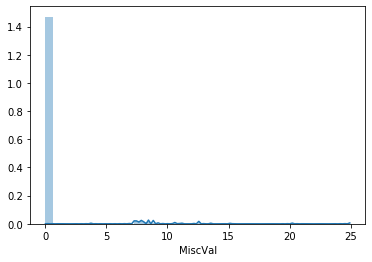

In [21]:
sns.distplot(np.cbrt(df['MiscVal']))

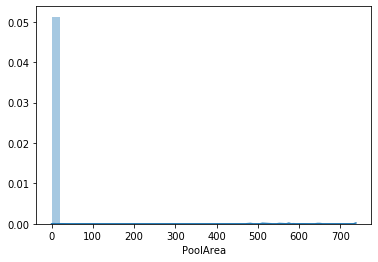

In [22]:
sns.distplot(df['PoolArea'])

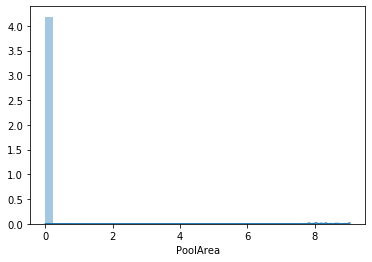

In [23]:
sns.distplot(np.cbrt(df['PoolArea']))

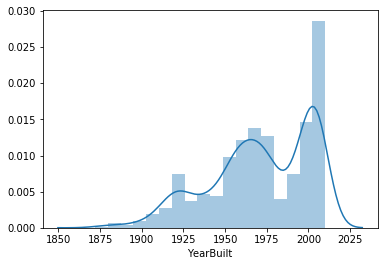

In [24]:
sns.distplot(df['YearBuilt'])

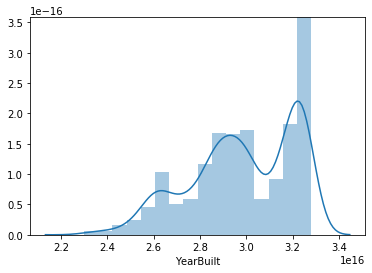

In [25]:
sns.distplot(np.power(df['YearBuilt'],5))

In [26]:
col = df.select_dtypes(include=np.number).columns
col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

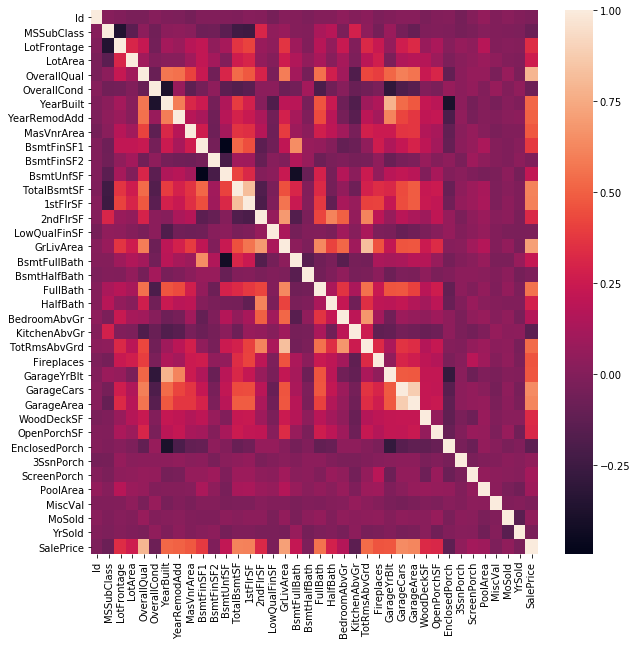

In [27]:
# heatmap plot on correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df[col].corr()) # df[col].corr() -> pearson correlation coefficient [-1,1]
plt.show()

strongly correlated features:
'1stFlrSF' & 'TotalBsmtSF'
'GarageArea' & 'GarageCars'
'GarageYrBlt' & 'YearBuilt'

In [28]:
df.shape

(1460, 77)

In [29]:
df[categorical_features].isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [30]:
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']
df[cols].isnull().sum()/df.shape[0]

BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [31]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [32]:
for each in df['FireplaceQu'].unique():
    print('val: {}; count: {}'.format(each,df[df.FireplaceQu==each].shape[0]/df.FireplaceQu.shape[0]))

val: nan; count: 0.0
val: TA; count: 0.21438356164383562
val: Gd; count: 0.2602739726027397
val: Fa; count: 0.022602739726027398
val: Ex; count: 0.01643835616438356
val: Po; count: 0.0136986301369863


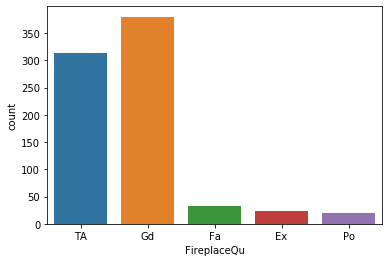

In [33]:
sns.countplot(df['FireplaceQu'])

In [34]:
df.dropna(axis = 0, inplace=True)

In [35]:
df.shape

(747, 77)

In [36]:
df1 = pd.get_dummies(df)

In [37]:
df1.shape

(747, 255)

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=255)

In [40]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 

In [41]:
X = df1.drop(['Id','SalePrice'], axis = 1)


In [42]:
y = df1['SalePrice']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted)) 

Mean squared error: 598266844763919467731400792228233216.00
R²: -131568067126605207081844736.00


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)  # training
##### model evaluation
print('On train data: r^2 score', r2_score(y_train, rf.predict(X_train)))
print('On test data: r^2 score', r2_score(y_test, rf.predict(X_test)))

On train data: r^2 score 0.9716384070859984
On test data: r^2 score 0.661010109975927


C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train,y_train)  # training
##### model evaluation
print('On train data: r^2 score', r2_score(y_train, rf.predict(X_train)))
print('On test data: r^2 score', r2_score(y_test, rf.predict(X_test)))


C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


On train data: r^2 score 0.9694062708728778
On test data: r^2 score 0.7235047046645832


In [51]:
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring = 'r2',cv = 3 )
print('standard deviation:',np.std(scores))
print('Average:',np.mean(scores))
print(scores)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


standard deviation: 0.04054914466849638
Average: 0.7799229763163736
[0.75202177 0.83726127 0.75048588]


C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
df_test = pd.read_csv(r'C:\Users\Dell\Downloads\regression_test.csv')

In [53]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [121]:
df_test.shape

(562, 74)

In [54]:
null_count = df_test.isnull().sum()
null_per = round(null_count/df_test.shape[0]*100,2)
dumm_df = pd.concat([pd.DataFrame(null_count, columns=['Null count']), 
                     pd.DataFrame(null_per, columns=['Null Precentage'])], axis = 1)
dumm_df = dumm_df.sort_values(by = ['Null Precentage'], ascending = False)
dumm_df[dumm_df['Null Precentage']>0]

Null count  Null Precentage
PoolQC              1456            99.79
MiscFeature         1408            96.50
Alley               1352            92.67
Fence               1169            80.12
FireplaceQu          730            50.03
LotFrontage          227            15.56
GarageYrBlt           78             5.35
GarageQual            78             5.35
GarageFinish          78             5.35
GarageCond            78             5.35
GarageType            76             5.21
BsmtCond              45             3.08
BsmtQual              44             3.02
BsmtExposure          44             3.02
BsmtFinType1          42             2.88
BsmtFinType2          42             2.88
MasVnrType            16             1.10
MasVnrArea            15             1.03
MSZoning               4             0.27
BsmtHalfBath           2             0.14
Utilities              2             0.14
Functional             2             0.14
BsmtFullBath           2             0.14
BsmtFinSF1             1             0.07
BsmtFinSF2             1             0.07
BsmtUnfSF              1             0.07
KitchenQual            1             0.07
TotalBsmtSF            1             0.07
Exterior2nd            1             0.07
GarageCars             1             0.07
Exterior1st            1             0.07
GarageArea             1             0.07
SaleType               1             0.07

In [55]:
col = ['PoolQC','MiscFeature','Alley','Fence']
df_test.drop(col, axis = 1, inplace = True)

In [56]:
df_test.drop(['Id'], axis = 1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition
0             20       RH         80.0    11622   Pave      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0         NaN     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0        0       6    2010       WD        Normal
1             20       RL         81.0    14267   Pave      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0         NaN     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0    12500       6    2010       WD        Normal
2             60       RL         74.0    13830   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0        0       3    2010       WD        Normal
3             60       RL         78.0     9978   Pave      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA      PConc       TA       TA           No          GLQ       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y      SBrkr       926       678             0       1604           0.0           0.0         2         1             3             1          Gd            

In [57]:
df_test.drop(['1stFlrSF','GarageArea','GarageYrBlt'],axis = 1,inplace = True)

In [120]:
df_test.shape

(562, 74)

In [58]:
df_test.dropna(axis = 0, inplace=True)

In [59]:
df_test.shape

(562, 73)

In [60]:
df1_test = pd.get_dummies(df_test)

In [61]:
df1_test.shape

(562, 231)

In [62]:
df1_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=231)

In [63]:
df1.shape

(747, 255)

In [64]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=255)

In [101]:
cols = df1.columns.difference(df1_test.columns)
print(cols)# columns in df1 but not in df_test

Index([], dtype='object')


In [74]:
df1.drop(cols,axis = 1,inplace = True)

In [102]:
c = df1_test.columns.difference(df1.columns)
print(c)
df1_test.drop(c,axis = 1, inplace = True)

Index([], dtype='object')


In [107]:
X_test_ = df1_test
#X_test_ = df1_test.drop(['Id'],axis = 1)

In [108]:
X_test_.shape

(562, 226)

In [109]:
df1.shape

(747, 226)

In [110]:
df1_test.shape

(562, 226)

In [111]:
df.shape

(747, 77)

In [112]:
X = df1

In [113]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_ = scale.fit_transform(X)
# = scale.transform(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [115]:
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train,y_train)  # training
##### model evaluation
print('On train data: r^2 score', r2_score(y_train, rf.predict(X_train)))
print('On test data: r^2 score', r2_score(y_test, rf.predict(X_test)))

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


On train data: r^2 score 0.971967230590788
On test data: r^2 score 0.7515293031579087


In [116]:
X_test_.shape

(562, 226)

In [117]:
pred = rf.predict(X_test_)

In [118]:
df_test['SalePrice'] = pred
df_test[['Id','SalePrice']].to_csv('Submission_HousePrice.csv',index = False)

In [119]:
df_test.shape

(562, 74)